In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [2]:
df= pd.read_csv(r"kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


##### what is Kyphosis?

##### Kyphosis is a spinal disorder in which an excessive outward curve of the spine results in an abnormal rounding of the upper back. The condition is sometimes known as "roundback" or—in the case of a severe curve—as "hunchback." Kyphosis can occur at any age, but is common during adolescence.

##### We are given a problem to predict whether Kyphosis is present or not in a person based on age of the patient in months, number of vertebrates involved, and the number of the vertebrae that was operated

In [3]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [4]:
df.shape

(81, 4)

##### EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209FC63E820>,
      dtype=object)

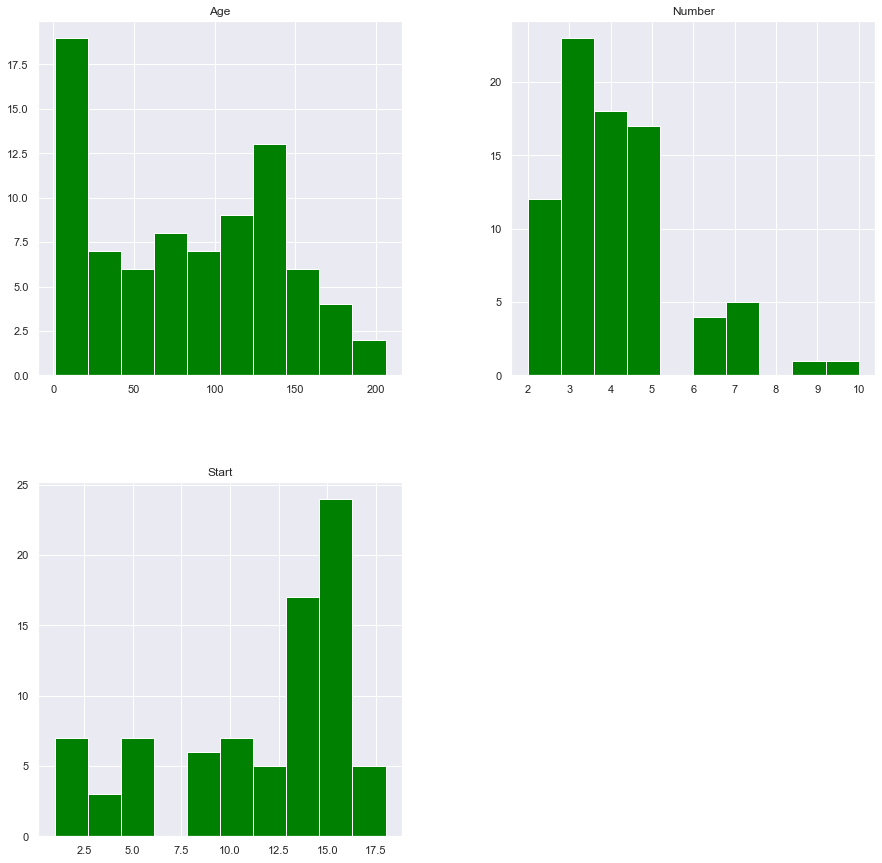

In [13]:
df.hist(figsize=(15,15), color="green")

In [11]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


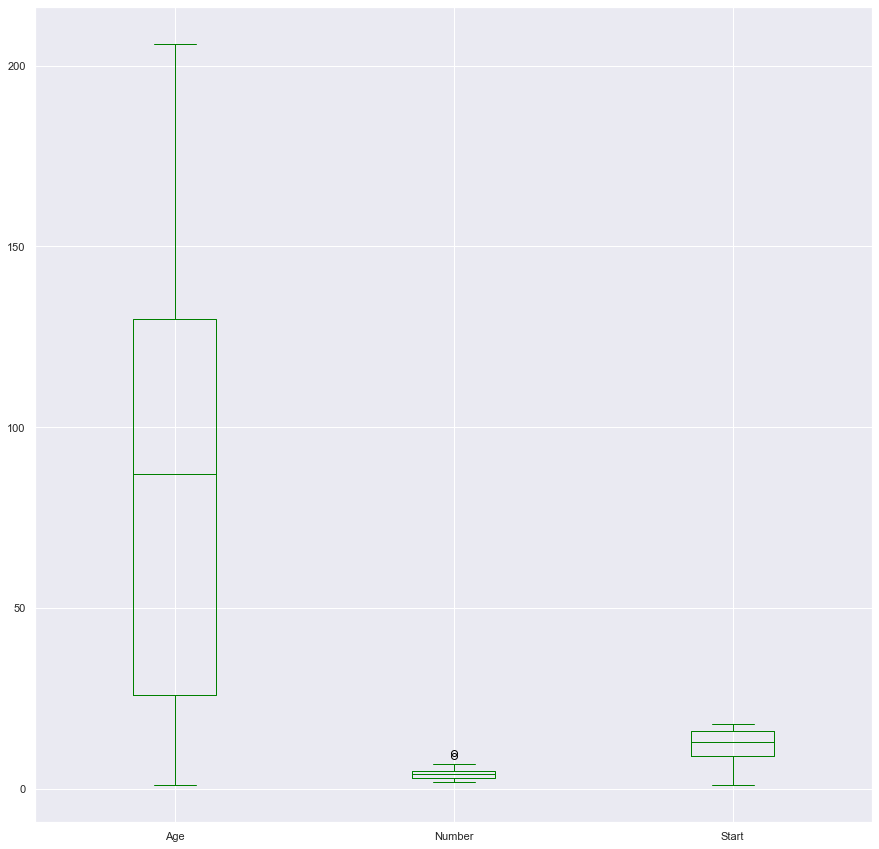

In [25]:
df.boxplot(figsize=(15,15), color="green")

In [29]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

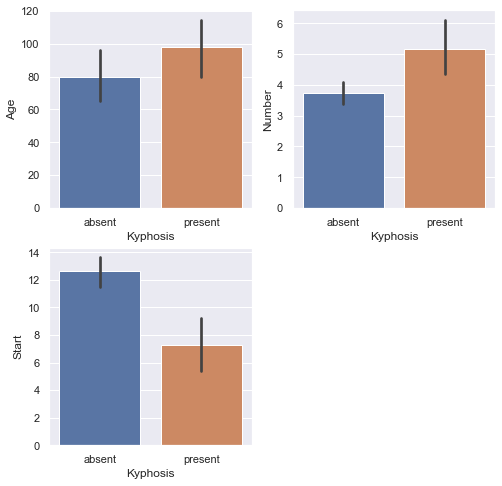

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.barplot(x="Kyphosis", y="Age", data=df)
plt.subplot(2,2,2)
sns.barplot(x="Kyphosis", y="Number", data=df)
plt.subplot(2,2,3)
sns.barplot(x="Kyphosis", y="Start", data=df)

##### here above we can see that for age feature the frequency of kyphosis present is more, for number feature kyphosis is more, for start feature it is less that is absent is more.

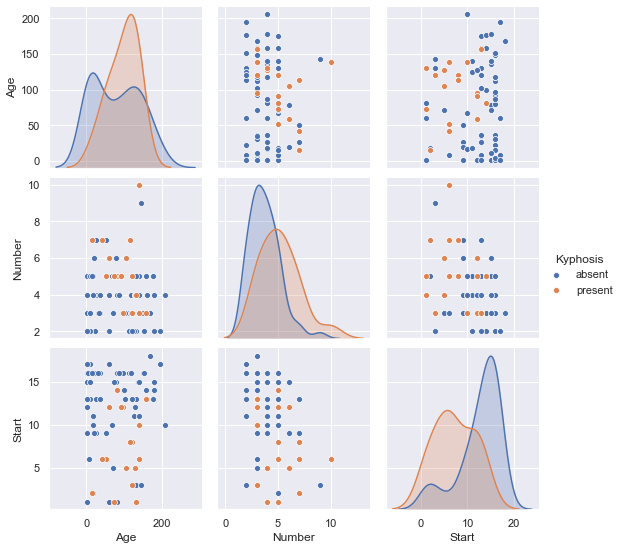

In [37]:
sns.pairplot(df, hue="Kyphosis")

In [38]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age       104.0
Number      2.0
Start       7.0
dtype: float64


In [39]:
df_new_1 = df[~((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new_1.shape

(79, 4)

In [40]:
df_new_1.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


##### getting our X and y for training and testing

In [106]:
X = df_new_1.drop('Kyphosis',axis=1)
y = df_new_1['Kyphosis']

In [162]:
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 79, dtype: object

##### model training using decision tree and random forest one by one

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dtree = DecisionTreeClassifier(max_depth=5)

In [111]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [112]:
pred= dtree.predict(X_test)

In [113]:
pred

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'present', 'absent', 'present', 'absent'],
      dtype=object)

In [115]:
dtree.score(X_test,y_test), dtree.score(X_train,y_train)

(0.9166666666666666, 0.9636363636363636)

In [163]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.94      0.94      0.94        18
     present       0.83      0.83      0.83         6

    accuracy                           0.92        24
   macro avg       0.89      0.89      0.89        24
weighted avg       0.92      0.92      0.92        24



##### visualizing the tree created

In [117]:
from sklearn import tree

<IPython.core.display.Javascript object>

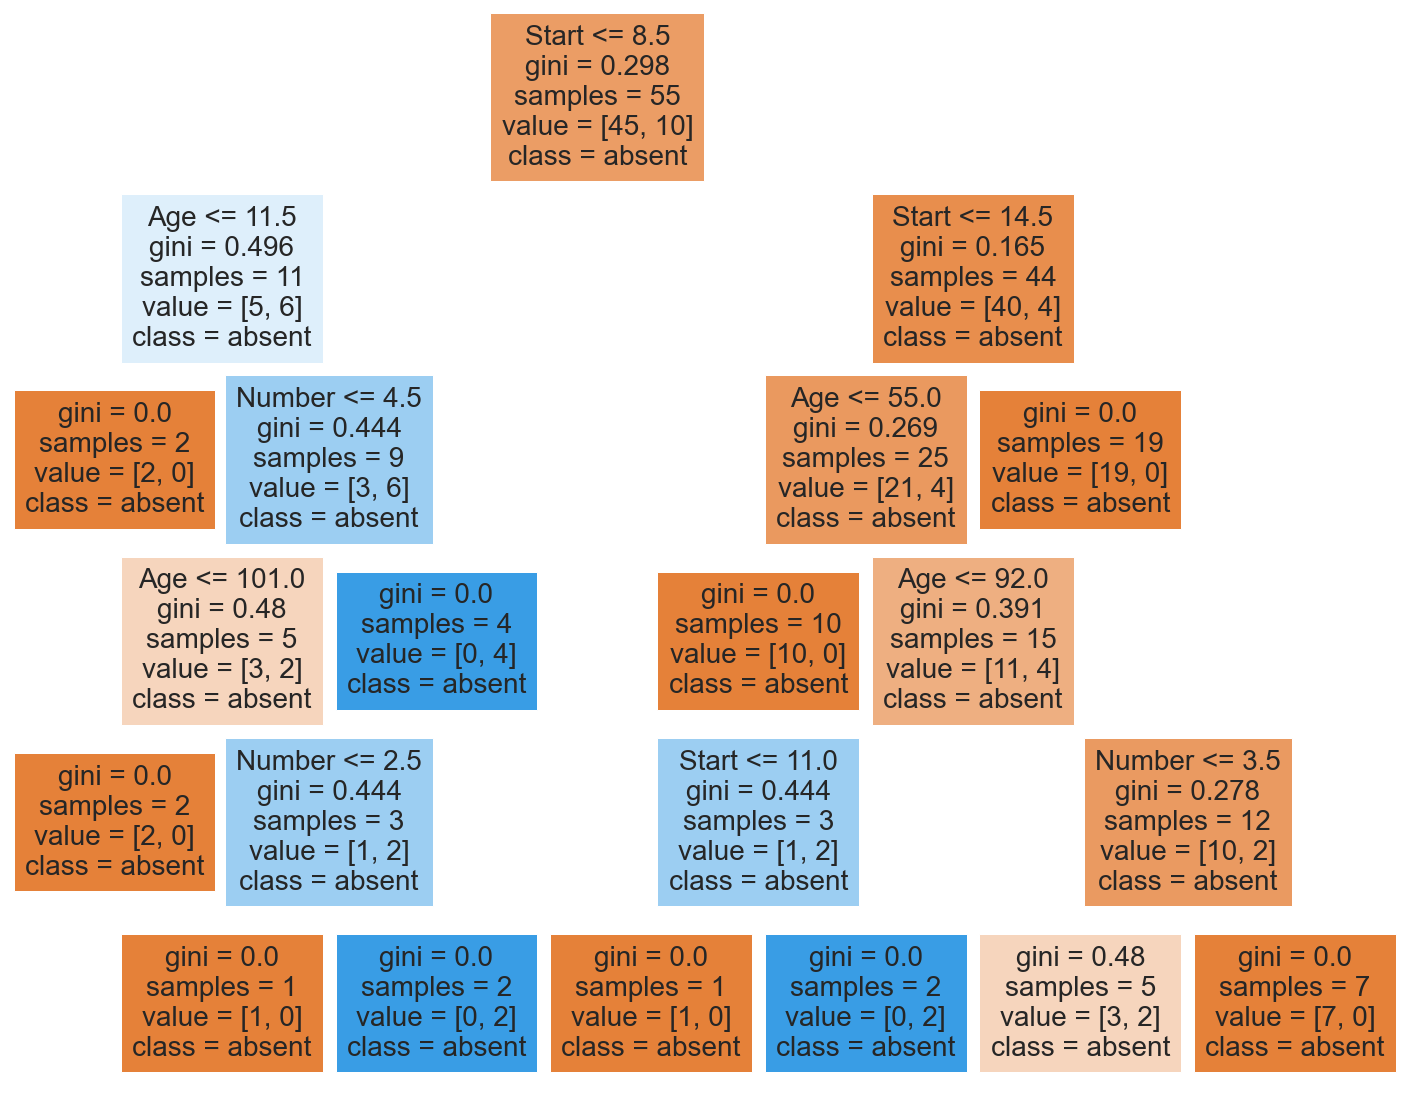

In [118]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X.columns,  
                   class_names=y,
                   filled=True)

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rand= RandomForestClassifier(n_estimators=200, max_depth=5)

In [158]:
rand.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [159]:
rand.score(X_train,y_train)

0.9636363636363636

In [160]:
y_p= rand.predict(X_test)

In [161]:
rand.score(X_test,y_test)

0.875

In [164]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

      absent       0.86      1.00      0.92        18
     present       1.00      0.50      0.67         6

    accuracy                           0.88        24
   macro avg       0.93      0.75      0.79        24
weighted avg       0.89      0.88      0.86        24



##### here we see that Decision tree performs better than Random Forest in terms of accuracy, precision, recall and f1 score

#### plotting the confusion matrix for decision tree

In [166]:
cm=confusion_matrix(y_test,pred)

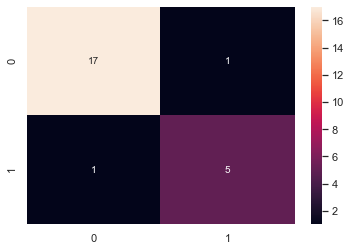

In [167]:
sns.heatmap(cm, annot=True)

##### here we can clearly see that out of 18 0's 1 was wrongly predicted as 1 and the rest 17 were rightly predicted as 0. 
#### for 1's 5 were predicted correctly asd 1 and only 1 was predicted as 0. So we can say that this model is really a good model for making prediction

##### pickling

In [169]:
import joblib

In [170]:
joblib.dump(dtree, 'dtree.pkl')

['dtree.pkl']